In [40]:
print("Name: Aung Thura Hein")
print("ID: 6726135")

Name: Aung Thura Hein
ID: 6726135


In [41]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import uniform
import statsmodels.formula.api as smf

In [42]:
ad_conversion = pd.read_csv("ad_conversion.csv")
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


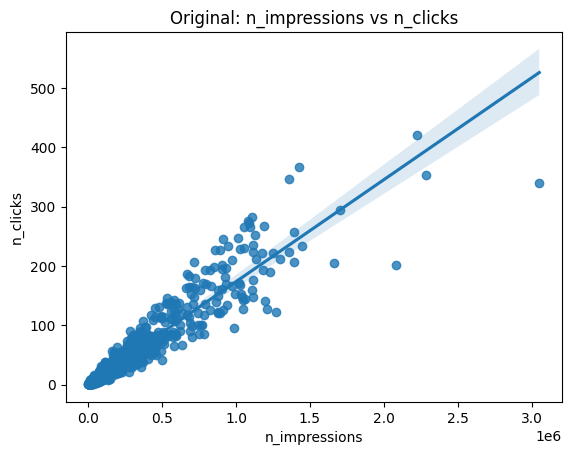

In [43]:
sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion)
plt.title("Original: n_impressions vs n_clicks")
plt.show()

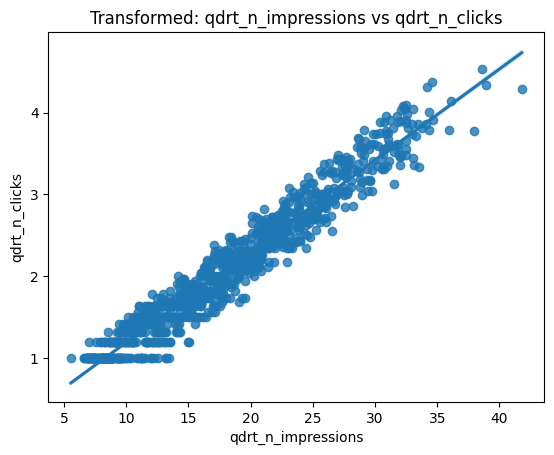

In [44]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25

sns.regplot(x = "qdrt_n_impressions", y = "qdrt_n_clicks", data = ad_conversion)
plt.title("Transformed: qdrt_n_impressions vs qdrt_n_clicks")
plt.show()

Observation: Yes, the points track the regression line much more closely. The relationship is now much more linear with reduced heteroscedasticity.

In [45]:
mdl_click_vs_impression = smf.ols("qdrt_n_clicks ~ qdrt_n_impressions",data=ad_conversion).fit()
print("Model parameters:")
print(mdl_click_vs_impression.params)

Model parameters:
Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64


In [46]:
explanatory_data = pd.DataFrame({"n_impressions": np.arange(0, 3000001, 500000)})
explanatory_data["qdrt_n_impressions"] = explanatory_data["n_impressions"] ** 0.25
prediction_data = explanatory_data.copy()
prediction_data["qdrt_n_clicks"] = mdl_click_vs_impression.predict(explanatory_data)

print("Prediction data (transformed + original impressions):")
print(prediction_data)

Prediction data (transformed + original impressions):
   n_impressions  qdrt_n_impressions  qdrt_n_clicks
0              0            0.000000       0.071748
1         500000           26.591479       3.037576
2        1000000           31.622777       3.598732
3        1500000           34.996355       3.974998
4        2000000           37.606031       4.266063
5        2500000           39.763536       4.506696
6        3000000           41.617915       4.713520


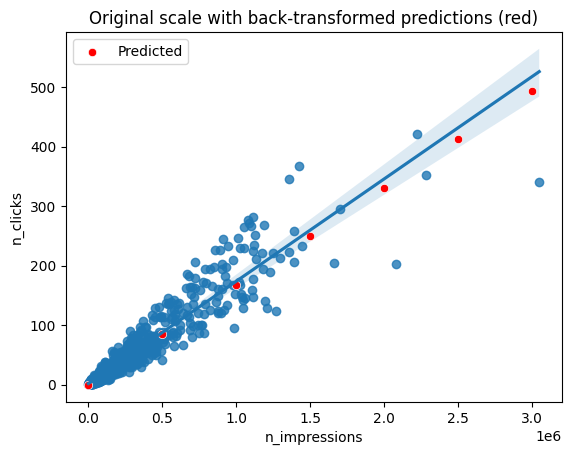

In [47]:
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
sns.regplot(x = "n_impressions", y = "n_clicks", data=ad_conversion)
sns.scatterplot(x = "n_impressions", y = "n_clicks", data = prediction_data, color="red", label="Predicted")
plt.title("Original scale with back-transformed predictions (red)")
plt.legend()
plt.show()

In [48]:
print("R-squared:", mdl_click_vs_impression.rsquared)
mse = mdl_click_vs_impression.mse_resid
print("mse:", mse)
rse = np.sqrt(mse)
print("rse:", rse)

R-squared: 0.9445272817143905
mse: 0.038772133892971475
rse: 0.19690640896875722


In [49]:
print("Determine whether this model is a good fit")
print("Yes, this is a strong fit. R-squared ≈ 0.9445 means the model explains ~94.5% of the variance in the transformed clicks. The quarter-root transformation successfully linearizes the relationship and stabilizes variance. On the original scale, the red curve closely follows the trend of the data.")

print("\nRSE interpretation")
print(f"The RSE ≈ {round(rse, 4)}")
print("Given that qdrt_n_clicks values range roughly 0–5 in the data, this is a minor error!")

Determine whether this model is a good fit
Yes, this is a strong fit. R-squared ≈ 0.9445 means the model explains ~94.5% of the variance in the transformed clicks. The quarter-root transformation successfully linearizes the relationship and stabilizes variance. On the original scale, the red curve closely follows the trend of the data.

RSE interpretation
The RSE ≈ 0.1969
Given that qdrt_n_clicks values range roughly 0–5 in the data, this is a minor error!


In [28]:
print("Name: Aung Thura Hein")
print("ID: 6726135")

Name: Aung Thura Hein
ID: 6726135
